# 1: Import required packages & functions <a class="anchor" id="chapter1"></a>

In [1]:
# clear all variables
for i in list(globals().keys()):
    if(i[0] != '_'):
        exec('del {}'.format(i))

#suppress future warnings -- not really a good idea 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
        
# suppress future warnings -- not really a good idea 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import csv
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') # uses vector figures in pdf exports
plt.style.use('seaborn-pastel')

# create a folder
def create_folder(folder):
    import os     
    try: 
        os.mkdir(folder) 
    except FileExistsError:
        print("Directory [ %s ] already exists"%folder)

#create folder to store results
create_folder('CFAS and ADNI')
create_folder('CFAS and ADNI/data')
create_folder('Figures')

Directory [ CFAS and ADNI ] already exists
Directory [ CFAS and ADNI/data ] already exists
Directory [ Figures ] already exists


# 2: CFAS Data <a class="anchor" id="chapter2"></a>

In [2]:
# extract dataset
cfas = pd.read_csv(r'Dataset/master.csv',header = 0)
# cfas = pd.read_csv(r'CFAS and ADNI/data/master.csv',header = 0)

In [3]:
cfas_features = ['Case',
'sex', 
'education', 
'aged', 
'brainwgt', 
'BraakStage', 
'ThalStage', 
'brainfix', 
'pminterv',
'cortatr', 
'atrhippo', 
'ather', 
'lacune', 'infarct', 
'haemorr',
'arter', 'artersev', 
'cerad9', 
'plaqsc',
'plaqdiff', 'plaqdift', 'plaqdifp', 'plaqdifo',
'losss',
'atrhippo',
'ArgyrGrains',
'CAATotalSev',
'dem_nver4']

cfas_selected = cfas[cfas_features]
cfas_selected

,Case,sex,education,aged,brainwgt,BraakStage,ThalStage,brainfix,pminterv,cortatr,...,plaqsc,plaqdiff,plaqdift,plaqdifp,plaqdifo,losss,atrhippo,ArgyrGrains,CAATotalSev,dem_nver4
0,1,Women,10.0,74.0,1100.0,1.0,2.0,Fresh,5.0,Yes,...,0.0,Mod,Mild,Mod,Mild,No,Mod,0.0,0.0,No dementia
1,2,Women,NaN,95.0,980.0,5.0,5.0,Fresh,7.0,Yes,...,5.0,Mild,Mild,Mild,Mod,Mild,Mod,0.0,9.0,Dementia
2,3,Women,NaN,82.0,1000.0,2.0,3.0,Fresh,10.0,Yes,...,1.0,Mod,Mod,Mod,Mod,Mild,No,0.0,2.0,Dementia
3,4,Women,10.0,85.0,1100.0,3.0,3.0,Fresh,3.0,Yes,...,0.0,Mild,Mild,Mild,Mod,Mild,Mod,0.0,0.0,No dementia
4,5,Women,9.0,70.0,1100.0,2.0,0.0,Fresh,42.0,Yes,...,0.0,No,No,No,No,Mod,Mild,0.0,0.0,No dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,20195,Women,9.0,87.0,1310.0,2.0,1.0,Fresh,55.0,No,...,0.0,Mild,No,No,Mild,No,NaN,0.0,0.0,No dementia
182,23193,Men,9.0,74.0,1180.0,2.0,2.0,Fresh,24.0,Yes,...,3.0,Mod,Mod,Mild,Mild,No,Mild,0.0,0.0,No dementia
183,23493,Men,9.0,73.0,1400.0,0.0,1.0,Fixed,54.0,No,...,0.0,No,No,No,No,No,NaN,0.0,0.0,No dementia
184,26399,Men,9.0,73.0,NaN,2.0,0.0,Fixed,NaN,No,...,0.0,Mild,No,No,Mod,No,NaN,0.0,7.0,No dementia


### 2.1. Combine features in CFAS <a class="anchor" id="section_2_1"></a>

In [4]:
cfas_combined = pd.DataFrame(cfas_selected).copy()

#### 2.1.1. Combine features in CFAS (infarct and lacune) <a class="anchor" id="section_2_1_1"></a>

In [5]:
'''Combine both CFAS features [infarct and lacune]'''

cfas_combined['lacune_infarct'] = np.nan

for i in range(len(cfas_combined)):
    if ((cfas_combined.infarct[i] == 'Yes') | (cfas_combined.lacune[i] == 'Yes')):
        cfas_combined.iat[i,-1] = 'Yes'
    elif ((cfas_combined.infarct[i] == 'No') | (cfas_combined.lacune[i] == 'No') &
          ((cfas_combined.infarct[i] != 'Yes') | (cfas_combined.lacune[i] != 'Yes'))):
        cfas_combined.iat[i,-1] = 'No'
    else:
        cfas_combined.iat[i,-1] = np.nan
        

cfas_combined.drop(labels=['lacune', 'infarct'], axis=1, inplace=True)
cfas_combined.lacune_infarct.value_counts()

Yes    74
No      9
Name: lacune_infarct, dtype: int64

#### 2.1.2. Combine features in CFAS (arter and artersev) <a class="anchor" id="section_2_1_2"></a>

In [6]:
'''Combine both CFAS features [arter and artersev]'''
cfas_combined = pd.DataFrame(cfas_combined).copy()

cfas_combined['arter_artersev'] = np.nan

for i in range(len(cfas_combined)):
    if (cfas_combined.arter[i] == 'Yes'):
        cfas_combined.iat[i,-1] = cfas_combined.loc[i].at['artersev']
    elif (cfas_combined.arter[i] == 'No'):
        cfas_combined.iat[i,-1] = 'No'
    else:
        cfas_combined.iat[i,-1] = np.nan

cfas_combined.drop(labels=['arter', 'artersev'], axis=1, inplace=True)
cfas_combined.arter_artersev.value_counts()

Mild    86
No      61
Mod     30
Sev      5
Name: arter_artersev, dtype: int64

#### 2.1.4. Combine features in CFAS (plaqdiff, plaqdift, plaqdifp, and plaqdifo) <a class="anchor" id="section_2_1_4"></a>

In [7]:
'''Combine both CFAS features [plaqdiff, plaqdift, plaqdifp, and plaqdifo]'''
cfas_combined = pd.DataFrame(cfas_combined).copy()

cfas_combined['plaqdif_f_t_p_o'] = np.nan

for i in range(len(cfas_combined)):
    if ((cfas_combined.plaqdiff[i] == 'No') & (cfas_combined.plaqdift[i] == 'No') &
        (cfas_combined.plaqdifp[i] == 'No') & (cfas_combined.plaqdifo[i] == 'No')):
        
        cfas_combined.iat[i,-1] = 'No'
        
    elif ((cfas_combined.plaqdiff[i] == np.nan) & (cfas_combined.plaqdift[i] == np.nan) &
          (cfas_combined.plaqdifp[i] == np.nan) & (cfas_combined.plaqdifo[i] == np.nan)):
        cfas_combined.iat[i,-1] = np.nan
    else:
        cfas_combined.iat[i,-1] = "Yes"
        

cfas_combined.drop(['plaqdiff', 'plaqdift', 'plaqdifp', 'plaqdifo'], axis=1, inplace=True)
cfas_combined.plaqdif_f_t_p_o.value_counts()


Yes    148
No      38
Name: plaqdif_f_t_p_o, dtype: int64

### 2.2. Rename CFAS Features <a class="anchor" id="section_2_2"></a>

In [8]:
cfas_combined = cfas_combined.loc[:,~cfas_combined.columns.duplicated()]
cfas_combined.rename({'Case':'ID',
                        'sex':'sex',
                        'education':'education',
                        'aged':'age',
                        'brainwgt':'brain weight',
                        'BraakStage': 'braak stage',
                        'ThalStage':'Thal phase',
                        'brainfix':'brain fresh/fixed weight',
                        'pminterv':'post mortem interval',
                        'cortatr':'cortical atrophy',
                        'atrhippo':'hippocampus atrophy', 
                        'ather':'atherosclerosis', 
                        'lacune_infarct':'infarcts and lacunes', 
                        'haemorr':'haemorrhage',
                        'arter_artersev':'arteriolar sclerosis', 
                        'cerad9':'pick disease', 
                        'plaqsc':'neocortical neuritic plaques',
                        'plaqdif_f_t_p_o':'diffuse plaques',
                        'losss':'neuronal loss in substantia nigra',
                        'ArgyrGrains':'argyrophilic grains disease',
                        'CAATotalSev':'cerebral amyloid angiopathy',
                        'dem_nver4':'diagnostic'}, axis=1, inplace=True)
diagnosis = cfas_combined.diagnostic
cfas_combined.drop(['diagnostic'], axis=1, inplace=True)
cfas_combined['diagnostic'] = diagnosis

### 2.3. Encoding CFAS Features <a class="anchor" id="section_2_3"></a>

In [9]:
'''
convert all features values to numeric
'''

cfas_combined_numeric = pd.DataFrame(cfas_combined).copy()

cfas_combined_numeric.sex.replace({'Men':0, 'Women':1}, inplace=True)
cfas_combined_numeric['brain fresh/fixed weight'].replace({'Fixed':0, 'Fresh':1}, inplace=True)
cfas_combined_numeric['cortical atrophy'].replace({'No':0, 'Yes':1}, inplace=True)
cfas_combined_numeric['hippocampus atrophy'].replace({"Don't know":np.nan, 'No':0, 'Mild':1, 'Mod':2, 'Sev':3}, inplace=True)
cfas_combined_numeric['atherosclerosis'].replace({"Don't know":np.nan, 'No':0, 'Mild':1, 'Mod':2, 'Sev':3}, inplace=True)
cfas_combined_numeric.haemorrhage.replace({'No':0, 'Yes':1}, inplace=True)
cfas_combined_numeric['pick disease'].replace({'No':0, 'Yes':1}, inplace=True)
cfas_combined_numeric['neuronal loss in substantia nigra'].replace({'No':0, 'Mild':1, 'Mod':2, 'Sev':3}, inplace=True)
cfas_combined_numeric['infarcts and lacunes'].replace({'No':0, 'Yes':1}, inplace=True)
cfas_combined_numeric['arteriolar sclerosis'].replace({'No':0, 'Mild':1, 'Mod':2, 'Sev':3}, inplace=True)
cfas_combined_numeric['diffuse plaques'].replace({'No':0, 'Yes':1}, inplace=True)
cfas_combined_numeric['diagnostic'].replace({'No dementia':0, 'Dementia':1}, inplace=True)


'''
convert all features values to categorical
'''
cfas_combined['education'] = cfas_combined['education'].replace([6,7,8,9,10],11)
cfas_combined.replace({"Don't know": np.nan}, inplace=True, regex=True)
cfas_combined["braak stage"].replace({0:'Stage 0', 1:'Stage 1', 2:'Stage 2', 3:'Stage 3', 4:'Stage 4', 5:'Stage 5', 6:'Stage 6'}, inplace=True)
cfas_combined["Thal phase"].replace({0:'Phase 0', 1:'Phase 1', 2:'Phase 2', 3:'Phase 3', 4:'Phase 4', 5:'Phase 5'}, inplace=True)
cfas_combined['argyrophilic grains disease'].replace({0:'No', 1:'Yes'}, inplace=True)
cfas_combined['neocortical neuritic plaques'].replace({0.0:'No', 1.0:'Mild', 3.0:'Mod', 5.0:'Sev'}, inplace=True)

cfas_combined


#### Save files as csv ####
create_folder('CFAS and ADNI/data')
cfas_combined_numeric.to_csv('CFAS and ADNI/data/cfas_combined_numeric_Binary_Remove(MCI).csv',index=False)
cfas_combined.to_csv('CFAS and ADNI/data/cfas_combined_Binary_Remove(MCI).csv',index=False)



Directory [ CFAS and ADNI/data ] already exists


# 3: ADNI Data <a class="anchor" id="chapter3"></a>

In [10]:
adni_merge = pd.read_csv(r'Dataset/ADNIMERGE.csv',header = 0)
adni_patho = pd.read_csv(r'Dataset/NEUROPATH_07_06_21.csv',header = 0)

In [11]:
demo_adni = adni_merge[adni_merge.RID.isin(adni_patho.RID)]

demo_adni['EXAMDATE_bl'] = pd.to_datetime(demo_adni['EXAMDATE_bl'])
demo_adni['EXAMDATE'] = pd.to_datetime(demo_adni['EXAMDATE'])

demo_adni.sort_values(by=['RID','VISCODE'], inplace=True)

demo_adni_drop = demo_adni.drop_duplicates(subset=['RID'], keep='last')

patho_missing_DX = demo_adni_drop[['RID','VISCODE', 'PTGENDER', 'PTEDUCAT', 'AGE','EXAMDATE_bl', 'EXAMDATE', 'DX_bl', 'DX']]
patho_missing_DX.sort_values(by=['RID','VISCODE'], inplace=True)
patho_missing_DX
missing_DX = patho_missing_DX[patho_missing_DX.DX.isnull()].reset_index()


In [12]:
patho_merge_adni = demo_adni[['RID','VISCODE', 'PTGENDER', 'PTEDUCAT', 'AGE','EXAMDATE_bl', 'EXAMDATE', 'DX_bl', 'DX']]
patho_merge_adni.sort_values(by=['RID','VISCODE'], inplace=True)
patho_merge_adni

patho_merge_adni[patho_merge_adni.RID == 108].reset_index()


,index,RID,VISCODE,PTGENDER,PTEDUCAT,AGE,EXAMDATE_bl,EXAMDATE,DX_bl,DX
0,273,108,bl,Male,18,78.2,2006-02-14,2006-02-14,LMCI,MCI
1,5373,108,m06,Male,18,78.2,2006-02-14,2006-08-08,LMCI,MCI
2,274,108,m12,Male,18,78.2,2006-02-14,2007-02-22,LMCI,MCI
3,275,108,m18,Male,18,78.2,2006-02-14,2007-09-08,LMCI,Dementia
4,276,108,m24,Male,18,78.2,2006-02-14,2008-02-26,LMCI,Dementia
5,5374,108,m30,Male,18,78.2,2006-02-14,2008-08-25,LMCI,NaN
6,277,108,m36,Male,18,78.2,2006-02-14,2009-12-02,LMCI,Dementia
7,4358,108,m48,Male,18,78.2,2006-02-14,2010-02-25,LMCI,Dementia
8,278,108,m60,Male,18,78.2,2006-02-14,2011-02-15,LMCI,Dementia
9,5375,108,m66,Male,18,78.2,2006-02-14,2011-08-23,LMCI,NaN


In [13]:
results =pd.DataFrame(patho_missing_DX).copy()

for index, row in missing_DX.iterrows():
    ids = patho_merge_adni[patho_merge_adni.RID == row.RID].reset_index(drop=True)
    length = len(ids.index)
    for index, row in ids.iterrows():
        opposite_index = length - (index + 1)
        #Looping backward
        if pd.isnull(ids.DX.iloc[opposite_index]) == False:
            results.loc[results.RID == row.RID, 'DX'] = ids.DX.iloc[opposite_index]
            break;            

In [14]:
adni_patho.sort_values(by='RID', inplace=True)
df = results[['RID', 'PTGENDER', 'PTEDUCAT', 'DX']]
adni_patho = adni_patho.merge(df, on='RID', how='left')


### 3.1. Combine features in ADNI <a class="anchor" id="section_3_1"></a>

In [15]:
adni_features = ['RID',
'PTGENDER', 
'PTEDUCAT', 
'NPDAGE', 
'NPWBRWT', 
'NPBRAAK', 
'NPTHAL', 
'NPWBRF', 
'NPPMIH',
'NPGRCCA', 
'NPGRHA', 
'NPAVAS',
'NPHEMO',                 
'NPPICK',                 
'NPNLOSS',
'NPFTDT5',
'NPAMY',             
'NPINF', 
'NPARTER', 
'NPNEUR',
'NPDIFF',
'DX']


adni_selected = pd.DataFrame(adni_patho[adni_features]).copy()

adni_combined = pd.DataFrame(adni_selected).copy()

In [16]:
'''NPGRCCA to Yes, No, and NaN]'''
adni_combined = pd.DataFrame(adni_combined).copy()
adni_combined["NPGRCCA"]
        

0     1
1     1
2     1
3     9
4     2
     ..
75    2
76    9
77    1
78    2
79    2
Name: NPGRCCA, Length: 80, dtype: int64

In [17]:
'''NPGRHA to Yes, No, and NaN]'''
adni_combined = pd.DataFrame(adni_combined).copy()
        

In [18]:
'''NPNEUR to Yes, No, and NaN]'''
adni_combined = pd.DataFrame(adni_combined).copy()
        

In [19]:
'''NPDIFF to Yes, No, and NaN]'''
adni_combined = pd.DataFrame(adni_combined).copy()
        

In [20]:
'''NPAMY to Yes, No, and NaN]'''
adni_combined = pd.DataFrame(adni_combined).copy()
        

### 3.2. Rename ADNI Features <a class="anchor" id="section_3_2"></a>


In [21]:
adni_combined.rename({'RID':'ID',
                        'PTGENDER':'sex',
                        'PTEDUCAT':'education',
                        'NPDAGE':'age',
                        'NPWBRWT':'brain weight',
                        'NPBRAAK': 'braak stage',
                        'NPTHAL':'Thal phase',
                        'NPWBRF':'brain fresh/fixed weight',
                        'NPPMIH':'post mortem interval',
                        'NPGRCCA':'cortical atrophy',
                        'NPGRHA':'hippocampus atrophy', 
                        'NPAVAS':'atherosclerosis', 
                        'NPINF':'infarcts and lacunes', 
                        'NPHEMO':'haemorrhage',
                        'NPARTER':'arteriolar sclerosis', 
                        'NPPICK':'pick disease', 
                        'NPNEUR':'neocortical neuritic plaques',
                        'NPDIFF':'diffuse plaques',
                        'NPNLOSS':'neuronal loss in substantia nigra',
                        'NPFTDT5':'argyrophilic grains disease',
                        'NPAMY':'cerebral amyloid angiopathy',
                        'DX':'diagnostic'}, axis=1, inplace=True)

In [22]:
(adni_combined.groupby(['sex','diagnostic']).agg({'age': ['median']}))

age
                  median
sex    diagnostic       
Female CN           84.0
       Dementia     79.0
       MCI          85.0
Male   CN           79.0
       Dementia     81.5
       MCI          86.0

### 3.3. Encoding ADNI Features <a class="anchor" id="section_3_3"></a>

# Save ADNI and CFAS datasets to csv files

In [23]:
features = ['ID', 'sex', 'education', 'age', 'brain weight', 'braak stage',
       'Thal phase', 'brain fresh/fixed weight', 'post mortem interval',
       'cortical atrophy', 'hippocampus atrophy', 'atherosclerosis',
       'haemorrhage', 'pick disease', 'neuronal loss in substantia nigra',
       'argyrophilic grains disease', 'cerebral amyloid angiopathy',
       'infarcts and lacunes', 'arteriolar sclerosis',
       'neocortical neuritic plaques', 'diffuse plaques', 'diagnostic']

cfas_combined = pd.DataFrame(cfas_combined[features]).copy()
adni_combined = pd.DataFrame(adni_combined[features]).copy()


## Drop the MCI rows (10 patients)

In [24]:
MCI_index = adni_combined[adni_combined.diagnostic == "MCI"].index
adni_combined.drop(index=MCI_index, inplace=True)
adni_combined.reset_index(drop=True, inplace=True)
adni_combined

,ID,sex,education,age,brain weight,braak stage,Thal phase,brain fresh/fixed weight,post mortem interval,cortical atrophy,...,haemorrhage,pick disease,neuronal loss in substantia nigra,argyrophilic grains disease,cerebral amyloid angiopathy,infarcts and lacunes,arteriolar sclerosis,neocortical neuritic plaques,diffuse plaques,diagnostic
0,8,Female,18,95,1131,1,1,1,4.50,1,...,0,0.0,1,1.0,0,0,2,0,1,CN
1,42,Male,18,81,1290,2,1,1,17.70,1,...,0,0.0,1,0.0,1,0,1,1,1,Dementia
2,53,Male,12,86,1240,2,3,1,22.50,1,...,0,0.0,2,1.0,0,0,1,0,1,Dementia
3,78,Female,18,78,1240,6,5,1,16.25,9,...,1,NaN,1,NaN,2,0,0,3,3,Dementia
4,91,Male,20,75,990,5,5,1,3.10,2,...,0,0.0,1,0.0,3,0,1,2,3,Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,5017,Male,18,86,1300,6,5,1,20.30,2,...,0,0.0,1,0.0,3,0,1,3,3,Dementia
66,5058,Male,20,66,1280,4,5,1,2.60,9,...,0,NaN,2,NaN,1,1,2,1,3,Dementia
67,5079,Male,18,79,1510,1,2,1,22.80,1,...,0,0.0,0,0.0,1,0,1,0,3,CN
68,5087,Female,17,69,1130,6,5,1,27.10,2,...,0,NaN,1,NaN,1,0,1,3,3,Dementia


In [25]:

'''
convert all features values to numeric
'''

adni_combined['brain fresh/fixed weight'] = adni_combined['brain fresh/fixed weight'].replace([8,9],np.nan)
adni_combined['post mortem interval'] = adni_combined['post mortem interval'].replace(9999,np.nan)
adni_combined['brain weight'] = adni_combined['brain weight'].replace(9999,np.nan)
adni_combined['neuronal loss in substantia nigra'] = adni_combined['neuronal loss in substantia nigra'].replace([8,9],np.nan)
adni_combined['cortical atrophy'] = adni_combined['cortical atrophy'].replace([8,9],np.nan)
adni_combined['hippocampus atrophy'] = adni_combined['hippocampus atrophy'].replace([8,9],np.nan)
adni_combined['atherosclerosis'] = adni_combined['atherosclerosis'].replace([8,9],np.nan)
adni_combined['sex'].replace({'Male':0, 'Female':1}, inplace=True)

adni_combined['diagnostic'].replace({'CN':0, 'Dementia':1}, inplace=True)

#### '''Save to csv files'''
adni_combined_numeric = pd.DataFrame(adni_combined).copy()
adni_combined_numeric.to_csv('CFAS and ADNI/data/adni_combined_numeric_Binary_Remove(MCI).csv',index=False)


'''
convert all features values to categorical
'''
adni_combined['sex'].replace({0:'Men', 1:'Women'}, inplace=True)
adni_combined["braak stage"].replace({0:'Stage 0', 1:'Stage 1', 2:'Stage 2', 3:'Stage 3', 4:'Stage 4', 5:'Stage 5', 6:'Stage 6'}, inplace=True)
adni_combined["Thal phase"].replace({0:'Phase 0', 1:'Phase 1', 2:'Phase 2', 3:'Phase 3', 4:'Phase 4', 5:'Phase 5'}, inplace=True)
adni_combined["brain fresh/fixed weight"].replace({1:'Fresh', 2:'Fixed'}, inplace=True)
adni_combined["cortical atrophy"].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined["hippocampus atrophy"].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined['atherosclerosis'].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined["haemorrhage"].replace({0:'No', 1:'Yes'}, inplace=True)
adni_combined["pick disease"].replace({0:'No', 1:'Yes'}, inplace=True)
adni_combined["neuronal loss in substantia nigra"].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined["argyrophilic grains disease"].replace({0:'No', 1:'Yes'}, inplace=True)
adni_combined['cerebral amyloid angiopathy'].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined['infarcts and lacunes'].replace({0:'No', 1:'Yes'}, inplace=True)
adni_combined['arteriolar sclerosis'].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined['neocortical neuritic plaques'].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined['diffuse plaques'].replace({0:'No', 1:'Mild', 2:'Mod', 3:'Sev'}, inplace=True)
adni_combined['diagnostic'].replace({0:'Cognitively Normal', 1:'Dementia'}, inplace=True)


'''Save to csv files'''
adni_combined.to_csv('CFAS and ADNI/data/adni_combined_Binary_Remove(MCI).csv',index=False)

# drop missing values in the diagnostic class in CFAS dataset
cfas_weka = pd.DataFrame(cfas_combined).copy()
adni_weka = pd.DataFrame(adni_combined).copy()

cfas_weka.dropna(subset=['diagnostic'], axis=0, inplace=True)
cfas_weka.reset_index(drop=True, inplace=True)

create_folder('CFAS and ADNI/data')
cfas_weka.to_csv('CFAS and ADNI/data/cfas_weka_Binary_Remove(MCI).csv',index=False)
adni_weka.to_csv('CFAS and ADNI/data/adni_weka_Binary_Remove(MCI).csv',index=False)


'''
Save data without demographics
'''
features_no_demo = ['braak stage','Thal phase',
       'cortical atrophy', 'hippocampus atrophy', 'atherosclerosis',
       'haemorrhage', 'neuronal loss in substantia nigra',
       'argyrophilic grains disease', 'cerebral amyloid angiopathy',
       'infarcts and lacunes', 'arteriolar sclerosis',
       'neocortical neuritic plaques', 'diffuse plaques', 'diagnostic']
cfas_weka_no_demo = pd.DataFrame(cfas_weka[features_no_demo]).copy()
adni_weka_no_demo = pd.DataFrame(adni_weka[features_no_demo]).copy()
cfas_weka_no_demo.to_csv('CFAS and ADNI/data/cfas_weka_no_demo_Remove(MCI).csv',index=False)
adni_weka_no_demo.to_csv('CFAS and ADNI/data/adni_weka_no_demo_Remove(MCI).csv',index=False)
cfas_weka_no_demo


Directory [ CFAS and ADNI/data ] already exists


,braak stage,Thal phase,cortical atrophy,hippocampus atrophy,atherosclerosis,haemorrhage,neuronal loss in substantia nigra,argyrophilic grains disease,cerebral amyloid angiopathy,infarcts and lacunes,arteriolar sclerosis,neocortical neuritic plaques,diffuse plaques,diagnostic
0,Stage 1,Phase 2,Yes,Mod,No,NaN,No,No,0.0,NaN,Mild,No,Yes,No dementia
1,Stage 5,Phase 5,Yes,Mod,No,NaN,Mild,No,9.0,NaN,No,Sev,Yes,Dementia
2,Stage 2,Phase 3,Yes,No,Mod,No,Mild,No,2.0,Yes,No,Mild,Yes,Dementia
3,Stage 3,Phase 3,Yes,Mod,No,NaN,Mild,No,0.0,NaN,No,No,Yes,No dementia
4,Stage 2,Phase 0,Yes,Mild,No,NaN,Mod,No,0.0,NaN,No,No,No,No dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Stage 2,Phase 1,No,NaN,No,NaN,No,No,0.0,NaN,No,No,Yes,No dementia
173,Stage 2,Phase 2,Yes,Mild,Mod,No,No,No,0.0,Yes,No,Mod,Yes,No dementia
174,Stage 0,Phase 1,No,NaN,Mod,No,No,No,0.0,Yes,No,No,No,No dementia
175,Stage 2,Phase 0,No,NaN,NaN,NaN,No,No,7.0,NaN,Mild,No,Yes,No dementia


# CFAS Distribution

# Both ADNI and CFAS Figure

In [26]:
# range the values of CAA in CFAS since there are numerical
def cerebral_amyloid_angiopathy_Cat(row):
    if row["cerebral amyloid angiopathy"] >= 1 and row["cerebral amyloid angiopathy"] < 7:
        return "1-6"
    elif row["cerebral amyloid angiopathy"] > 6 and row["cerebral amyloid angiopathy"] < 13:
        return "7-12"
    elif row["cerebral amyloid angiopathy"] > 12 and row["cerebral amyloid angiopathy"] < 19:
        return "13-18"
    elif row["cerebral amyloid angiopathy"] > 18 and row["cerebral amyloid angiopathy"] < 25:
        return "19-24"
    

    
cfas_distribution = pd.DataFrame(cfas_weka).copy()
cfas_distribution.drop(['ID'],axis=1, inplace=True)

# call cerebral_amyloid_angiopathy_Cat(row) function
cfas_distribution["cerebral amyloid angiopathy"] = cfas_distribution.apply(cerebral_amyloid_angiopathy_Cat,axis=1)

adni_distribution = pd.DataFrame(adni_weka).copy()
adni_distribution.drop(['ID'],axis=1, inplace=True)    
    


In [27]:


features_13 = ['braak stage', 'Thal phase', 'cortical atrophy', 'hippocampus atrophy',
            'atherosclerosis','haemorrhage', 'neocortical neuritic plaques',
           'neuronal loss in substantia nigra', 'argyrophilic grains disease',
           'cerebral amyloid angiopathy', 'infarcts and lacunes','arteriolar sclerosis', 
            'diffuse plaques', 'diagnostic']
# cfas_distribution
cfas_distribution_13features = pd.DataFrame(cfas_distribution[features_13]).copy()
cfas_distribution_13features = cfas_distribution_13features.rename('CFAS_{}'.format, axis=1)
cfas_distribution_13features


# adni_distribution
adni_distribution_13features = pd.DataFrame(adni_distribution[features_13]).copy()
adni_distribution_13features.diagnostic.replace({'Cognitively Normal':'No dementia'}, inplace=True)
adni_distribution_13features = adni_distribution_13features.rename('ADNI_{}'.format, axis=1)


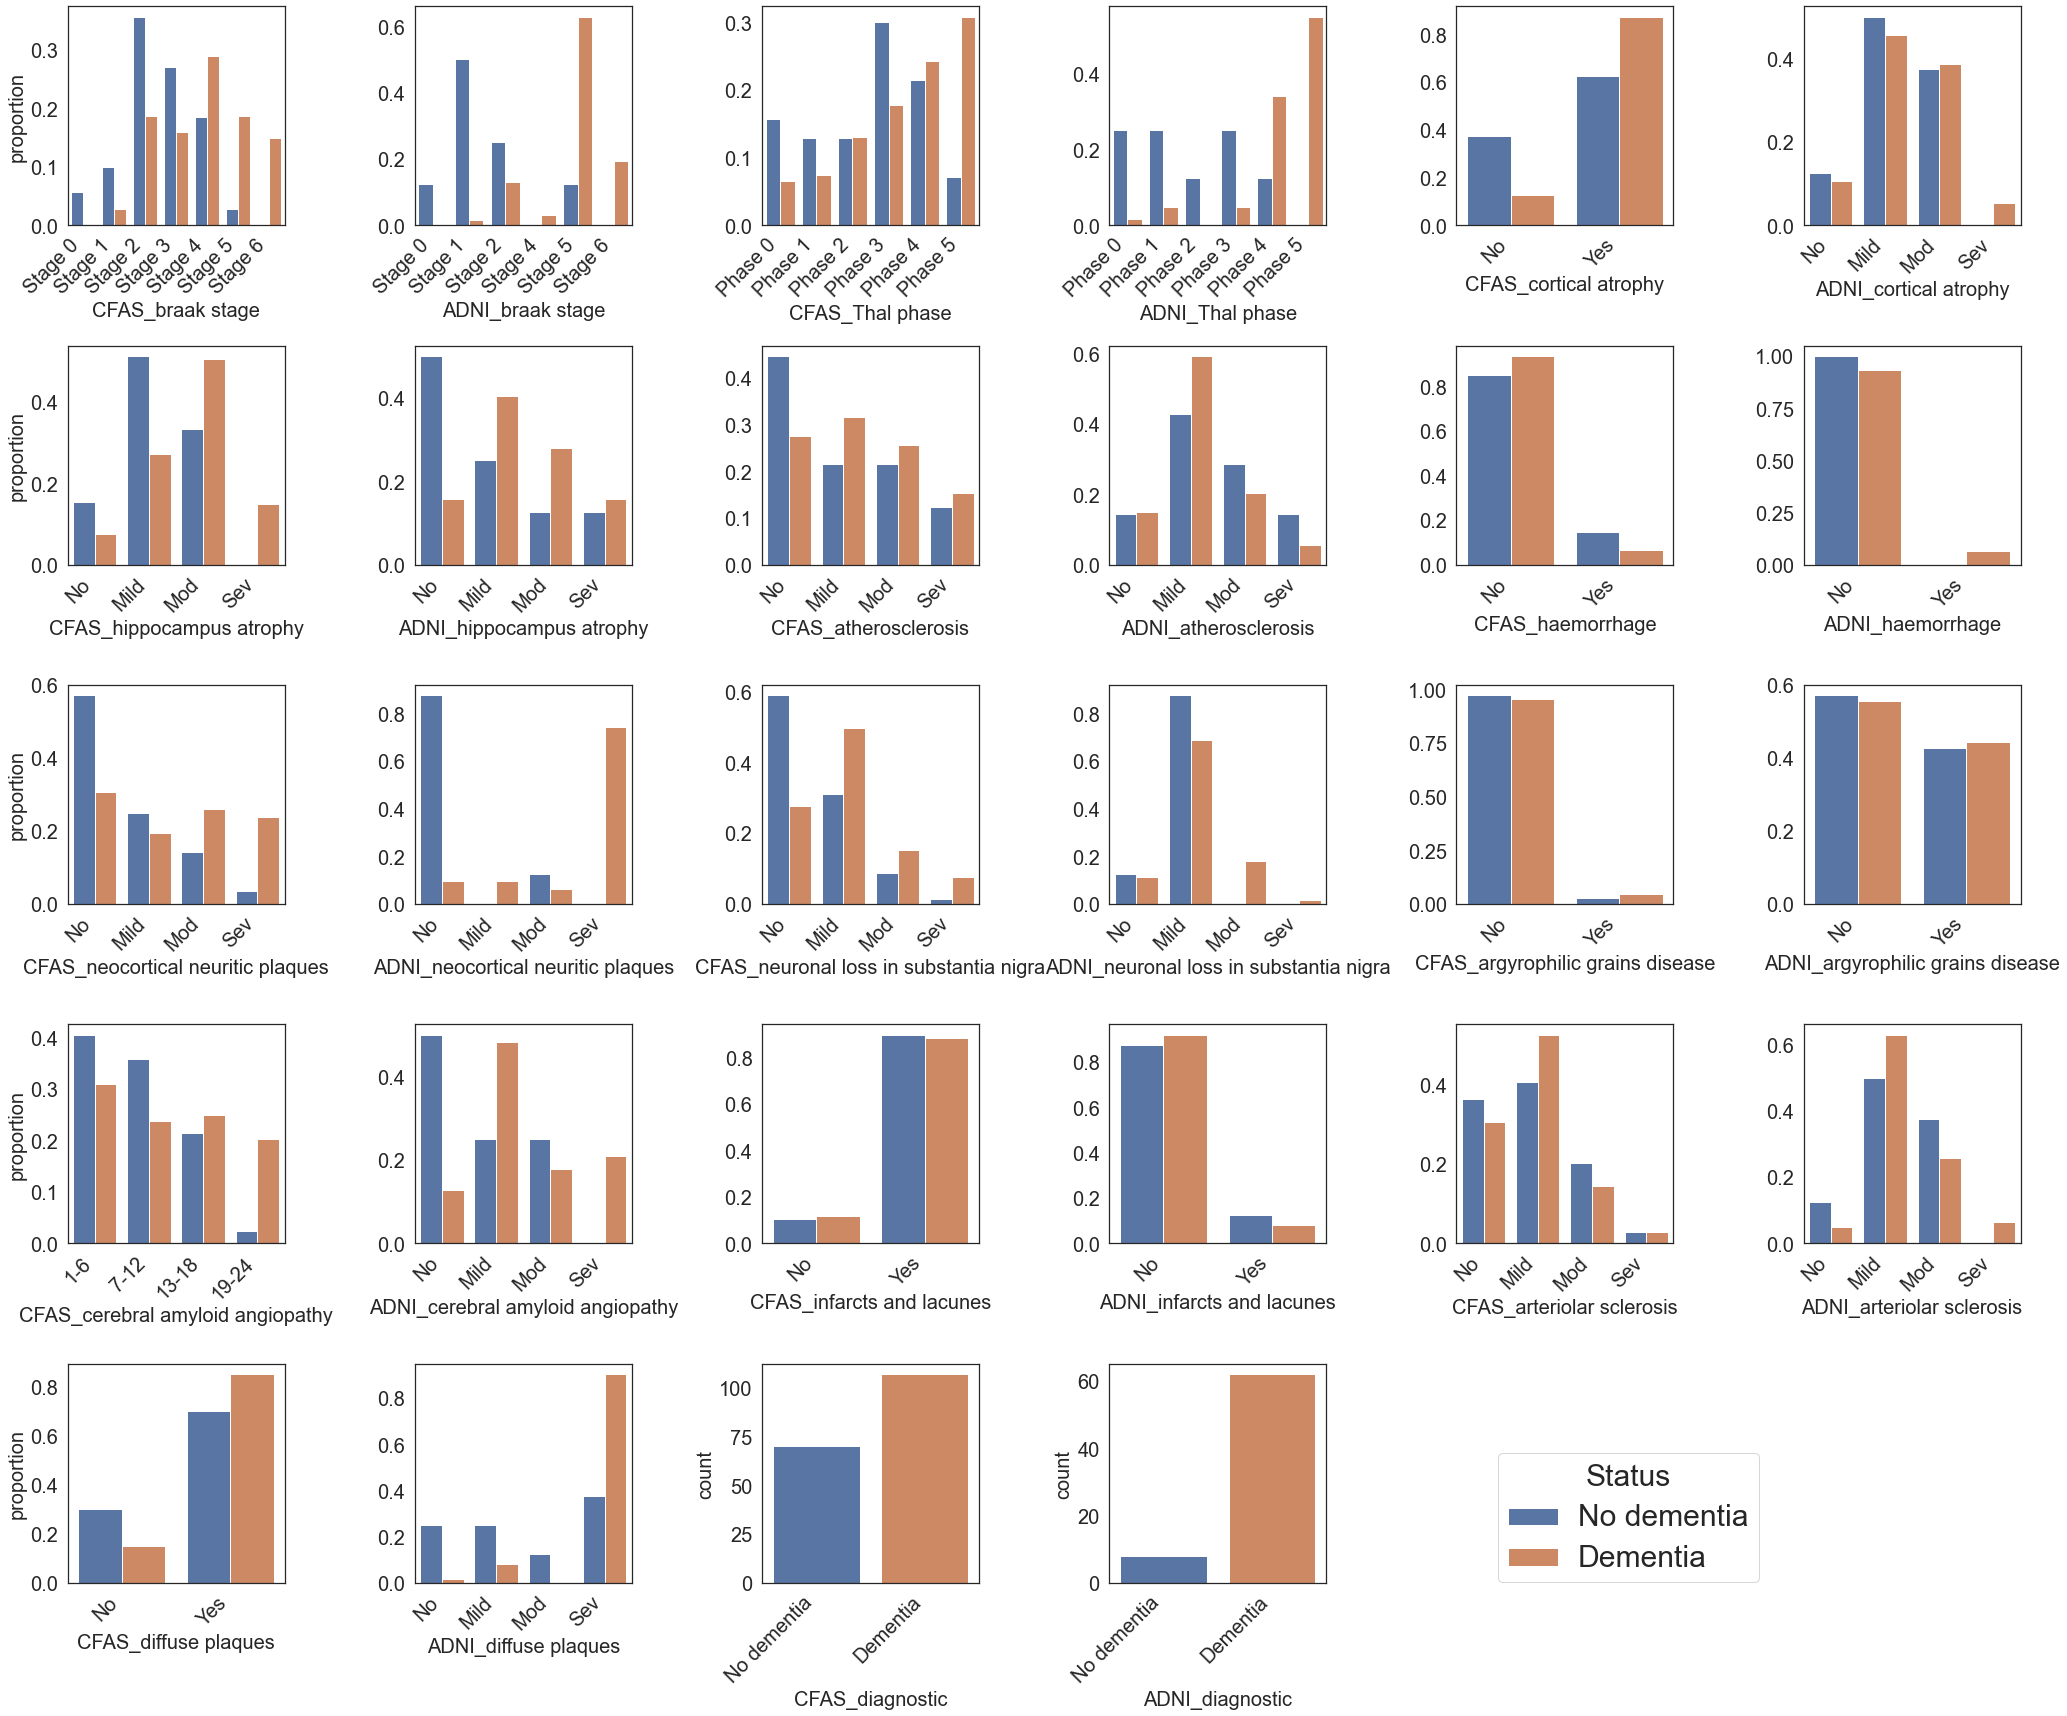

In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import textwrap

sns.set_theme(style="ticks", color_codes=True)
x_axis=range(5)

sns.set_theme(style="white")
size = 20
size_2 = 20
plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels

fig, axes =plt.subplots(5,6, figsize=(35,29), sharey=False) #
axes = axes.flatten()
# a = zip(axes, cfas_distribution_13features.columns) 
# b = zip(axes, adni_distribution_13features.columns)


cfas_adni_list = []
for i, j in zip(cfas_distribution_13features.columns, adni_distribution_13features.columns):
    cfas_adni_list.append(i)
    cfas_adni_list.append(j)
        



for ax, col in zip(axes, cfas_adni_list):

    if (col.startswith('CFAS_')) & (col != 'CFAS_diagnostic'):
        x, y, hue = col, "proportion", "CFAS_diagnostic"
        hue_order = ["No dementia", "Dementia"]
        order = pd.DataFrame(cfas_distribution_13features[x].value_counts().sort_index().reset_index())
        order= order['index'].values

        if order.dtype != 'float64':
            order = natsorted(order)

        if (col == 'CFAS_atherosclerosis') | (col == 'CFAS_neuronal loss in substantia nigra') | (col == 'CFAS_arteriolar sclerosis') | (col == 'CFAS_hippocampus atrophy') | (col == 'CFAS_neocortical neuritic plaques'):
            order = ['No', 'Mild', 'Mod', 'Sev']

        g = (cfas_distribution_13features[x]
         .groupby(cfas_distribution_13features[hue])
         .value_counts(normalize=True).sort_index()
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=order, hue_order=hue_order, ax=ax))
        
        g.legend([],[], frameon=False)
            
        plt.setp(ax.get_xticklabels(), rotation=45, size=size_2, horizontalalignment="right")
        plt.setp(ax.get_yticklabels(), size=size_2)
        ax.xaxis.get_label().set_fontsize(size_2) 
        ax.yaxis.get_label().set_fontsize(size_2)

        for ax in axes:
            ax.set_ylabel('')
            
    if (col.startswith('ADNI_')) & (col != 'ADNI_diagnostic'):
        x, y, hue = col, "proportion", "ADNI_diagnostic"
        hue_order = ["No dementia", "Dementia"]
        order = pd.DataFrame(adni_distribution_13features[x].value_counts().sort_index().reset_index())
        order= order['index'].values

        if order.dtype != 'float64':
            order = natsorted(order)

        if (col == 'ADNI_atherosclerosis') | (col == 'ADNI_neuronal loss in substantia nigra') | (col == 'ADNI_arteriolar sclerosis') | (col == 'ADNI_cortical atrophy'):
            order = ['No', 'Mild', 'Mod', 'Sev']
        if (col == 'ADNI_hippocampus atrophy') | (col == 'ADNI_cerebral amyloid angiopathy') | (col == 'ADNI_neocortical neuritic plaques') | (col == 'ADNI_diffuse plaques'):
            order = ['No', 'Mild', 'Mod', 'Sev']

        g = (adni_distribution_13features[x]
         .groupby(adni_distribution_13features[hue])
         .value_counts(normalize=True).sort_index()
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=order, hue_order=hue_order, ax=ax))
        
        if col == 'ADNI_diffuse plaques':
            g.legend([],[], frameon=True)
            l = g.legend(bbox_to_anchor=(6.25, 0.65))
            l.set_title('Status')
            plt.setp(ax.get_legend().get_texts(), fontsize=30) # for legend text
            plt.setp(ax.get_legend().get_title(), fontsize=30) # for legend title
            
        else:
            g.legend([],[], frameon=False)

        plt.setp(ax.get_xticklabels(), rotation=45, size=size_2, horizontalalignment="right")
        plt.setp(ax.get_yticklabels(), size=size_2)
        ax.xaxis.get_label().set_fontsize(size_2) 
        ax.yaxis.get_label().set_fontsize(size_2)

        for ax in axes:
            ax.set_ylabel('')

    if (col == 'CFAS_diagnostic'):
        a1 = sns.countplot(x=cfas_distribution_13features['CFAS_diagnostic'], ax=ax)
        plt.setp(ax.get_xticklabels(), rotation=45, size=size_2, horizontalalignment="right")
    if (col == 'ADNI_diagnostic'):
        a2 = sns.countplot(x=adni_distribution_13features['ADNI_diagnostic'], ax=ax)
        plt.setp(ax.get_xticklabels(), rotation=45, size=size_2, horizontalalignment="right")

axes[0].set_ylabel('proportion', size=size_2)
axes[6].set_ylabel('proportion', size=size_2)
axes[12].set_ylabel('proportion', size=size_2)
axes[18].set_ylabel('proportion', size=size_2)
axes[24].set_ylabel('proportion', size=size_2)



axes.flat[-1].set_visible(False) # to remove last plot
axes.flat[-2].set_visible(False) # to remove last plot

plt.tight_layout()
plt.subplots_adjust(wspace=0.6, hspace=0.55)


fig.savefig('Figures/cfas_adni_Distrbution_combined.png',dpi=300, bbox_inches="tight")
fig.savefig('Figures/cfas_adni_Distrbution_combined.pdf',dpi=300, bbox_inches="tight")

plt.show()

# Impute Missing Values & SMOTENC resampling data

### CFAS Dataset

In [29]:
# import numpy as np
# import pandas as pd
# from collections import Counter
# from sklearn.preprocessing import LabelEncoder
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from imblearn.over_sampling import SMOTENC

# cfas = pd.DataFrame(cfas_weka).copy()
# cfas.drop(['ID'], inplace=True, axis=1)
# cfas.dropna(subset=['diagnostic'], inplace=True)
# cfas.reset_index(drop=True, inplace=True)

# categorical = ['sex', 'education', 'braak stage',
#        'Thal phase', 'brain fresh/fixed weight','cortical atrophy', 'hippocampus atrophy',
#         'atherosclerosis','haemorrhage', 'pick disease', 'neocortical neuritic plaques',
#        'neuronal loss in substantia nigra', 'argyrophilic grains disease',
#        'cerebral amyloid angiopathy', 'infarcts and lacunes','arteriolar sclerosis', 
#         'diffuse plaques', 'diagnostic']

# numerical = ['age', 'brain weight', 'post mortem interval']


# cfas_test = pd.DataFrame(cfas[numerical]).copy()
# cfas_test = pd.concat([cfas_test, cfas[categorical]], axis=1)
# cfas_test

# '''
# impute missing values
# '''
# cfas_test[categorical] = cfas_test[categorical].apply(lambda series: pd.Series(
#     LabelEncoder().fit_transform(series[series.notnull()]),
#     index=series[series.notnull()].index))

# #create a model to impute numerical features
# imp_num = IterativeImputer(estimator=RandomForestRegressor(),
#                            initial_strategy='mean',
#                            max_iter=10, random_state=0)

# #create a model to impute catergorical features
# imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
#                            initial_strategy='most_frequent',
#                            max_iter=10, random_state=0)

# # fit_transform to impute both numerica and categorical values
# cfas_test[numerical] = imp_num.fit_transform(cfas_test[numerical])
# cfas_test[categorical] = imp_cat.fit_transform(cfas_test[categorical])

# '''
# SMOTENC resampling data
# '''
# X = cfas_test.iloc[:,:-1]
# y = cfas_test.iloc[:,-1]

# # summarize class distribution
# counter = Counter(y)
# print(counter)

# #get location of all caltegorical features
# cols_index = [X.columns.get_loc(col) for col in categorical[0:-1]]
# cols_index

# #apply smotenc 
# smote_nc = SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], random_state=0)
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)


# # # summarize the new class distribution
# counter = Counter(y_resampled)
# print(counter)

# #add feature with the class in one dataframe
# cfas_smotenc = pd.DataFrame(X_resampled).copy()
# cfas_smotenc['diagnostic'] = y_resampled
# cfas_smotenc[list(categorical)] = cfas_smotenc[list(categorical)].astype(int)
# cfas_smotenc

In [30]:
# cfas_smotenc.education.value_counts()

### ADNI Dataset

In [31]:
# import numpy as np
# import pandas as pd
# from collections import Counter
# from sklearn.preprocessing import LabelEncoder
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from imblearn.over_sampling import SMOTENC

# adni = pd.DataFrame(adni_combined_numeric).copy()
# adni.drop(['ID'], inplace=True, axis=1)
# adni.dropna(subset=['diagnostic'], inplace=True)
# adni.reset_index(drop=True, inplace=True)

# categorical = ['sex', 'education', 'braak stage',
#        'Thal phase', 'brain fresh/fixed weight','cortical atrophy', 'hippocampus atrophy',
#         'atherosclerosis','haemorrhage', 'pick disease', 'neocortical neuritic plaques',
#        'neuronal loss in substantia nigra', 'argyrophilic grains disease',
#        'cerebral amyloid angiopathy', 'infarcts and lacunes','arteriolar sclerosis', 
#         'diffuse plaques', 'diagnostic']

# numerical = ['age', 'brain weight', 'post mortem interval']


# adni_test = pd.DataFrame(adni[numerical]).copy()
# adni_test = pd.concat([adni_test, adni[categorical]], axis=1)
# adni_test

# '''
# impute missing values
# '''
# adni_test[categorical] = adni_test[categorical].apply(lambda series: pd.Series(
#     LabelEncoder().fit_transform(series[series.notnull()]),
#     index=series[series.notnull()].index))

# #create a model to impute numerical features
# imp_num = IterativeImputer(estimator=RandomForestRegressor(),
#                            initial_strategy='mean',
#                            max_iter=10, random_state=0)

# #create a model to impute catergorical features
# imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
#                            initial_strategy='most_frequent',
#                            max_iter=10, random_state=0)

# # fit_transform to impute both numerica and categorical values
# adni_test[numerical] = imp_num.fit_transform(adni_test[numerical])
# adni_test[categorical] = imp_cat.fit_transform(adni_test[categorical])
# print(adni_test.education.value_counts())

# '''
# SMOTENC resampling data
# '''
# X = adni_test.iloc[:,:-1]
# y = adni_test.iloc[:,-1]

# # summarize class distribution
# counter = Counter(y)
# print(counter)

# #get location of all caltegorical features
# cols_index = [X.columns.get_loc(col) for col in categorical[0:-1]]
# cols_index

# #apply smotenc 
# smote_nc = SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], random_state=0)
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)


# # # summarize the new class distribution
# counter = Counter(y_resampled)
# print(counter)

# #add feature with the class in one dataframe
# adni_smotenc = pd.DataFrame(X_resampled).copy()
# adni_smotenc['diagnostic'] = y_resampled
# # adni_smotenc[list(categorical)] = adni_smotenc[list(categorical)].astype(int)
# adni_smotenc

# #### '''Save to csv files'''
# # adni_combined_numeric.to_csv('CFAS and ADNI/data/adni_combined_numeric_Binary_Remove(MCI).csv',index=False)


In [32]:
# cfas_smotenc.to_csv('CFAS and ADNI/data/cfas_smotenc.csv',index=False)
# adni_smotenc.to_csv('CFAS and ADNI/data/adni_smotenc.csv',index=False)